<a href="https://colab.research.google.com/github/zainali60/ML/blob/main/ML_8_MAE%2CMSE%2CRMSE%2CRMSLE_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import statistics as st
sample = [600, 470, 170, 430, 300] 
print(st.mean(sample))
print(st.pstdev(sample)) 
print(st.pvariance(sample))

394
147.32277488562318
21704


In [5]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)  

0.9571734475374732

In [6]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='uniform_average')


0.9838709677419355

In [7]:
from sklearn.metrics import max_error
y_true = [3, 2, 7, 1]
y_pred = [4, 2, 7, 1]
max_error(y_true, y_pred)

1

In [1]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("/content/Salary_DataSet.csv")
data.head()

,Experences,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [9]:
#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

In [10]:
#regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#for predict the test values
y_prdict=reg.predict(X_test)
y_prdict

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

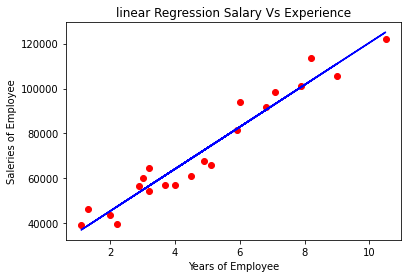

In [15]:
#Visualize the Traing data
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title("linear Regression Salary Vs Experience")
plt.xlabel("Years of Employee")
plt.ylabel("Saleries of Employee")
plt.show()

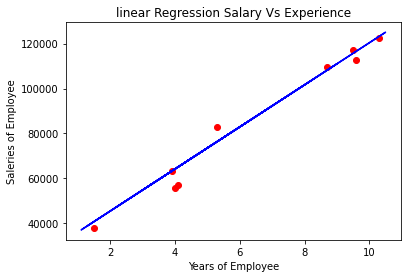

In [16]:
#Visualize the testing data
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train, reg.predict(X_train), color='blue')
plt.title("linear Regression Salary Vs Experience")
plt.xlabel("Years of Employee")
plt.ylabel("Saleries of Employee")
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_prdict)

3737.417861878896

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_prdict)


23370078.800832972

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
result=sqrt(mean_squared_error(y_test, y_prdict))
result

4834.260936361728

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_prdict))

0.07603710837968711

In [22]:
import statsmodels.api as sm
#import statsmodels.formula.api as sm
#import statsmodels.tools.tools.add_constant as sv
X1=sm.add_constant(X)
reg= sm.OLS(y,X1).fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        08:23:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""